In [1]:


import json
import pandas as pd
import time

import numpy as np
# from pandas.io.json import pandas.json_normalize

import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import ppscore as pps#pip install ppscore
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import dtale#pip install dtale
import numpy as np
from imblearn.combine import SMOTETomek

In [2]:
data=pd.read_csv('data.csv')

In [3]:
data

,req/baseUrl,req/body/note/title,req/body/note/desc,req/fresh,req/headers/host,req/headers/user-agent,req/headers/content-type,req/headers/org_id,req/headers/user_session_id,req/headers/accept,...,req/hostname,req/ip,req/originalUrl,req/path,req/protocol,req/secure,req/stale,req/subdomains/0,req/xhr,isSafe
0,/crm/note,Tina Johnson,Top recognize eat. Fact whom spend area thing ...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,...,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,True
1,/crm/note,Clayton Cooper,As possible American many prepare four strong....,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,...,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,True
2,/crm/note,Curtis Wolfe,Tuesday Notes or 2 like 2 XSP Class,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,...,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,False
3,/crm/note,Laura Fisher,State third represent energy campaign not forg...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,...,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,True
4,/crm/note,Tyler Santos,Us enjoy since. Time identify image position o...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,...,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,/crm/note,Bridget Elliott,Recently crime before five thought bit. Card f...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,...,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,True
996,/crm/note,James Rocha,"<img src=1 href=1 onerror=""javascript:alert(1)...",False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,...,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,False
997,/crm/note,Jasmine Gibson,Set nature they then low resource truth. Edge ...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,...,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,True
998,/crm/note,Mr. Antonio Valdez DDS,Push case them such face suffer. Letter middle...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,...,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,True


In [299]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   req/baseUrl                  1000 non-null   object
 1   req/body/note/title          1000 non-null   object
 2   req/body/note/desc           1000 non-null   object
 3   req/fresh                    1000 non-null   bool  
 4   req/headers/host             1000 non-null   object
 5   req/headers/user-agent       1000 non-null   object
 6   req/headers/content-type     1000 non-null   object
 7   req/headers/org_id           1000 non-null   object
 8   req/headers/user_session_id  1000 non-null   object
 9   req/headers/accept           1000 non-null   object
 10  req/headers/content-length   1000 non-null   int64 
 11  req/headers/user/name        1000 non-null   object
 12  req/headers/user/role        1000 non-null   object
 13  req/hostname                 1000 

# EDA WITH DTALE AUTOMATED PACKAGE

In [300]:
dtale.show(data)

http://DESKTOP-A3U9KEV:40000/dtale/main/1
It looks like this data may have already been loaded to D-Tale based on shape and column names. Here is URL of the data that seems to match it:

None

If you still want to load this data please use the following command:

dtale.show(df, ignore_duplicate=True)


In [301]:
for col in data:
    print(col)
    print()
    print('categories ------- % observations in category')
    print(data[col].value_counts(normalize = True)*100)
    print()
    print('=='*50)

req/baseUrl

categories ------- % observations in category
/crm/note    100.0
Name: req/baseUrl, dtype: float64

req/body/note/title

categories ------- % observations in category
Michael Smith     0.3
David Adams       0.2
Heather Davis     0.2
Heather Smith     0.2
Michael Davis     0.2
                 ... 
Emma Rodriguez    0.1
Jessica Wright    0.1
Lisa Guerra       0.1
Travis Mcguire    0.1
Anna Padilla      0.1
Name: req/body/note/title, Length: 994, dtype: float64

req/body/note/desc

categories ------- % observations in category
note title <title onPropertyChange title onPropertyChange="javascript:javascript:alert(1)"></title onPropertyChange>                                                                                    3.6
Meeting ")) or (("x"))=(("x Notes 12:30                                                                                                                                                                 3.3
text1<video src=1 href=1 onerror="javascript:ale

In [302]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   req/baseUrl                  1000 non-null   object
 1   req/body/note/title          1000 non-null   object
 2   req/body/note/desc           1000 non-null   object
 3   req/fresh                    1000 non-null   bool  
 4   req/headers/host             1000 non-null   object
 5   req/headers/user-agent       1000 non-null   object
 6   req/headers/content-type     1000 non-null   object
 7   req/headers/org_id           1000 non-null   object
 8   req/headers/user_session_id  1000 non-null   object
 9   req/headers/accept           1000 non-null   object
 10  req/headers/content-length   1000 non-null   int64 
 11  req/headers/user/name        1000 non-null   object
 12  req/headers/user/role        1000 non-null   object
 13  req/hostname                 1000 

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le=LabelEncoder()

In [27]:
data.columns

Index(['req/baseUrl', 'req/body/note/title', 'req/body/note/desc', 'req/fresh',
       'req/headers/host', 'req/headers/user-agent',
       'req/headers/content-type', 'req/headers/org_id',
       'req/headers/user_session_id', 'req/headers/accept',
       'req/headers/content-length', 'req/headers/user/name',
       'req/headers/user/role', 'req/hostname', 'req/ip', 'req/originalUrl',
       'req/path', 'req/protocol', 'req/secure', 'req/stale',
       'req/subdomains/0', 'req/xhr', 'isSafe'],
      dtype='object')

In [28]:
#data['req/baseUrl']=le.fit_transform(data['req/baseUrl'])
#data['req/body/note/title']=le.fit_transform(data['req/body/note/title'])
#data['req/body/note/desc']=le.fit_transform(data['req/body/note/desc'])
#data['req/fresh']=le.fit_transform(data['req/fresh'])
#data['req/headers/host']=le.fit_transform(data['req/headers/host'])
#data['req/headers/user-agent']=le.fit_transform(data['req/headers/user-agent'])
#data['req/headers/content-type']=le.fit_transform(data['req/headers/content-type'])
#data['req/headers/org_id']=le.fit_transform(data['req/headers/org_id'])
#data['req/headers/user_session_id']=le.fit_transform(data['req/headers/user_session_id'])
#data['req/headers/accept']=le.fit_transform(data['req/headers/accept'])
#ata['req/headers/content-length']=le.fit_transform(data['req/headers/content-length'])
#data['req/headers/user/name']=le.fit_transform(data['req/headers/user/name'])
#data['req/headers/user/role']=le.fit_transform(data['req/headers/user/role'])
#data['req/hostname']=le.fit_transform(data['req/hostname'])
#data['req/ip']=le.fit_transform(data['req/ip'])
#data['req/originalUrl']=le.fit_transform(data['req/originalUrl'])
#data['req/path']=le.fit_transform(data['req/path'])
#data['req/protocol']=le.fit_transform(data['req/protocol'])
#data['req/secure']=le.fit_transform(data['req/secure'])
#data['req/stale']=le.fit_transform(data['req/stale'])
#data['req/subdomains/0']=le.fit_transform(data['req/subdomains/0'])
#data['req/xhr']=le.fit_transform(data['req/xhr'])
data['isSafe']=le.fit_transform(data['isSafe'])

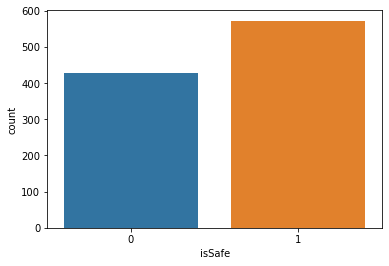

In [200]:
sns.countplot(data['isSafe'])
plt.show()

In [17]:
data

,req/baseUrl,req/body/note/title,req/body/note/desc,req/fresh,req/headers/host,req/headers/user-agent,req/headers/content-type,req/headers/org_id,req/headers/user_session_id,req/headers/accept,...,req/hostname,req/ip,req/originalUrl,req/path,req/protocol,req/secure,req/stale,req/subdomains/0,req/xhr,isSafe
0,0,935,665,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,206,36,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,225,692,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,590,602,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,957,700,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,126,504,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
996,0,398,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,409,552,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
998,0,701,490,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


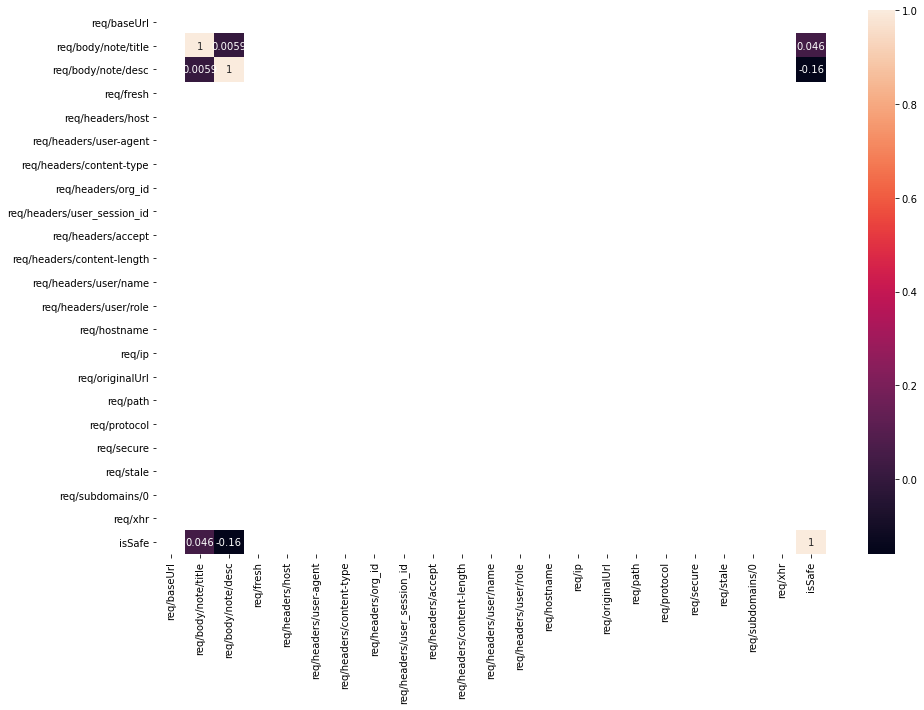

In [21]:
#plt.figure(figsize=(15,10))
#sns.heatmap(data.corr(),annot=True)
#plt.show()

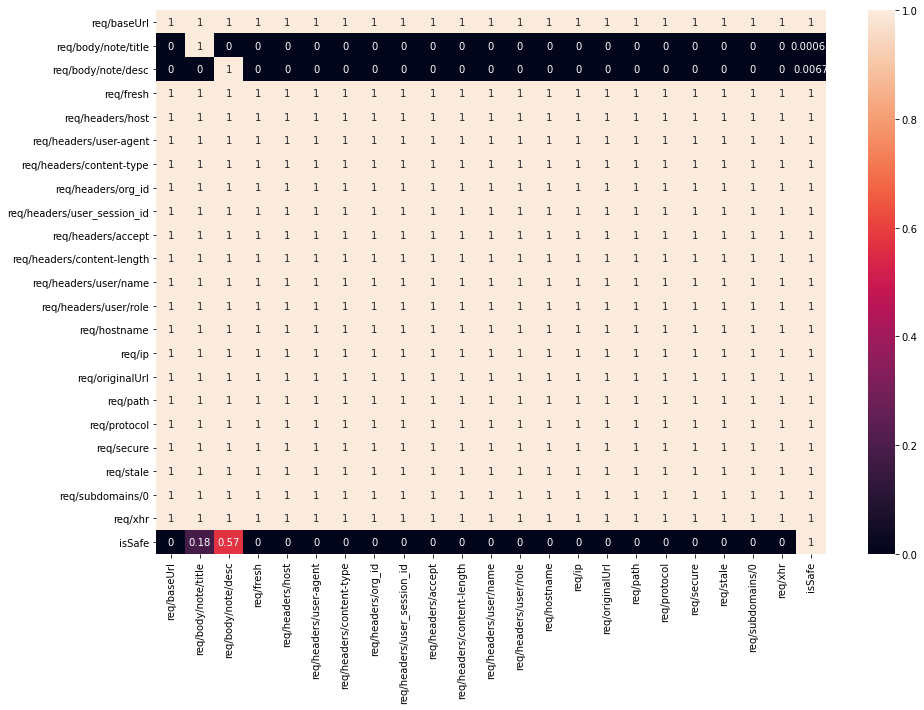

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(pps.matrix(data),annot=True)
plt.show()

# we are taking one  features req/body/note/desc because it has more feature importances compared to others 

In [4]:
messages=data[['req/body/note/desc']]

In [5]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['req/body/note/desc'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(ngram_range=(1, 1), lowercase=False)
train_route = tf.fit_transform(corpus)
#test_route = tf.transform(test['summary'])

train_route = pd.DataFrame(data=train_route.toarray(), columns=tf.get_feature_names())
#test_route = pd.DataFrame(data=test_route.toarray(), columns=tf.get_feature_names())

train_route.shape

(1000, 860)

from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(ngram_range=(1, 1), lowercase=False)
train_route1 = tf.fit_transform(data['req/body/note/title'])
#test_route = tf.transform(test['summary'])

train_route1 = pd.DataFrame(data=train_route1.toarray(), columns=tf.get_feature_names())
#test_route = pd.DataFrame(data=test_route.toarray(), columns=tf.get_feature_names())

train_route1.shape

In [310]:
smk = SMOTETomek()
X_res,y_res=smk.fit_sample(train1,y)

In [161]:
y_res.value_counts()

1    572
0    572
Name: isSafe, dtype: int64

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size = 0.30, random_state = 0)

# RANDOM FOREST

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [157]:
rf=RandomForestClassifier(random_state=0,n_estimators= 1400,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'auto',
 max_depth= 100,
 bootstrap= 'True')

In [158]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap='True', max_depth=100, n_estimators=1400,
                       random_state=0)

In [159]:
predr=rf.predict(X_test)

In [175]:
print(classification_report(predr,y_test))

print(confusion_matrix(predr,y_test))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85       136
           1       0.98      0.80      0.88       208

    accuracy                           0.87       344
   macro avg       0.87      0.88      0.86       344
weighted avg       0.89      0.87      0.87       344

[[132   4]
 [ 42 166]]


# Hyperparameter tuning

In [143]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [146]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 10.5min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [147]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=100, n_estimators=1400)

In [153]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [155]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=100, n_estimators=1400)

In [152]:
rf_random.best_score_

0.8237494485276863

# Xgboost

In [177]:
import xgboost

In [178]:
xgb=xgboost.XGBClassifier()

In [179]:
xgb.fit(X_train,y_train)

XGBClassifier()

In [180]:
pred=xgb.predict(X_test)

In [181]:
print(classification_report(pred,y_test))

print(confusion_matrix(pred,y_test))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81       136
           1       0.94      0.76      0.84       208

    accuracy                           0.83       344
   macro avg       0.83      0.84      0.82       344
weighted avg       0.85      0.83      0.83       344

[[125  11]
 [ 49 159]]


# Knn


In [182]:
from sklearn.preprocessing import StandardScaler

In [183]:
scaler = StandardScaler()

In [184]:
X1_train=scaler.fit_transform(X_train)
X1_test=scaler.fit_transform(X_test)

In [185]:
from sklearn.neighbors import KNeighborsClassifier

In [186]:
knn1 = KNeighborsClassifier(n_neighbors=1)

In [187]:
knn1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [188]:
pred10 = knn1.predict(X_test)

In [189]:
print(classification_report(pred10,y_test))
print('train',knn1.score(X_train,y_train))
print('test',knn1.score(X_test,y_test))
print(confusion_matrix(pred10,y_test))

              precision    recall  f1-score   support

           0       1.00      0.51      0.67       344
           1       0.00      0.00      0.00         0

    accuracy                           0.51       344
   macro avg       0.50      0.25      0.34       344
weighted avg       1.00      0.51      0.67       344

train 1.0
test 0.5058139534883721
[[174 170]
 [  0   0]]


In [72]:
error_rate = []

# Will take some time
for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

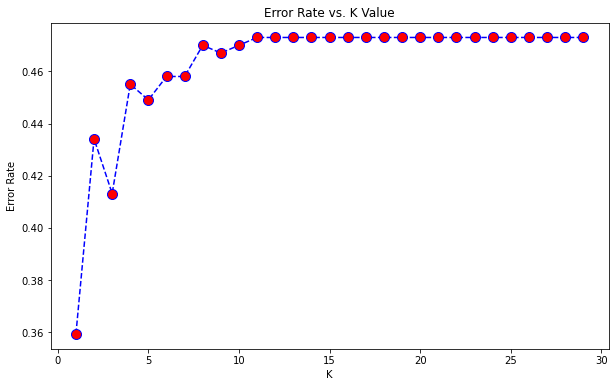

In [73]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# NB

In [190]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

y_pred=spam_detect_model.predict(X_test)

In [191]:
print(classification_report(y_pred,y_test))
print('train',spam_detect_model.score(X_train,y_train))
print('test',spam_detect_model.score(X_test,y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       113
           1       1.00      0.74      0.85       231

    accuracy                           0.82       344
   macro avg       0.82      0.87      0.82       344
weighted avg       0.88      0.82      0.83       344

train 0.82125
test 0.8226744186046512
[[113   0]
 [ 61 170]]


# CatBoost

In [192]:
from catboost import CatBoostClassifier

In [193]:
cat=CatBoostClassifier()

In [194]:
cat.fit(X_train,y_train)

Learning rate set to 0.015729
0:	learn: 0.6801062	total: 16.2ms	remaining: 16.2s
1:	learn: 0.6685286	total: 30.8ms	remaining: 15.4s
2:	learn: 0.6570524	total: 45.6ms	remaining: 15.1s
3:	learn: 0.6446632	total: 60.7ms	remaining: 15.1s
4:	learn: 0.6334867	total: 75.3ms	remaining: 15s
5:	learn: 0.6240407	total: 89.9ms	remaining: 14.9s
6:	learn: 0.6139849	total: 104ms	remaining: 14.8s
7:	learn: 0.6058909	total: 119ms	remaining: 14.8s
8:	learn: 0.5963896	total: 133ms	remaining: 14.7s
9:	learn: 0.5886101	total: 148ms	remaining: 14.6s
10:	learn: 0.5823655	total: 163ms	remaining: 14.6s
11:	learn: 0.5755414	total: 182ms	remaining: 15s
12:	learn: 0.5675644	total: 201ms	remaining: 15.3s
13:	learn: 0.5605519	total: 216ms	remaining: 15.2s
14:	learn: 0.5547528	total: 231ms	remaining: 15.2s
15:	learn: 0.5486649	total: 246ms	remaining: 15.1s
16:	learn: 0.5432287	total: 260ms	remaining: 15s
17:	learn: 0.5389777	total: 275ms	remaining: 15s
18:	learn: 0.5343948	total: 289ms	remaining: 14.9s
19:	learn: 0.

169:	learn: 0.3751231	total: 2.71s	remaining: 13.2s
170:	learn: 0.3748395	total: 2.73s	remaining: 13.2s
171:	learn: 0.3744038	total: 2.74s	remaining: 13.2s
172:	learn: 0.3738903	total: 2.76s	remaining: 13.2s
173:	learn: 0.3733602	total: 2.77s	remaining: 13.2s
174:	learn: 0.3728963	total: 2.79s	remaining: 13.1s
175:	learn: 0.3723802	total: 2.8s	remaining: 13.1s
176:	learn: 0.3713488	total: 2.82s	remaining: 13.1s
177:	learn: 0.3709873	total: 2.83s	remaining: 13.1s
178:	learn: 0.3706360	total: 2.85s	remaining: 13.1s
179:	learn: 0.3702943	total: 2.86s	remaining: 13s
180:	learn: 0.3698499	total: 2.88s	remaining: 13s
181:	learn: 0.3694093	total: 2.89s	remaining: 13s
182:	learn: 0.3689929	total: 2.91s	remaining: 13s
183:	learn: 0.3685229	total: 2.92s	remaining: 13s
184:	learn: 0.3681151	total: 2.94s	remaining: 12.9s
185:	learn: 0.3675415	total: 2.95s	remaining: 12.9s
186:	learn: 0.3671812	total: 2.97s	remaining: 12.9s
187:	learn: 0.3667134	total: 2.98s	remaining: 12.9s
188:	learn: 0.3664048	t

333:	learn: 0.3050809	total: 5.24s	remaining: 10.5s
334:	learn: 0.3046305	total: 5.26s	remaining: 10.4s
335:	learn: 0.3043496	total: 5.27s	remaining: 10.4s
336:	learn: 0.3037807	total: 5.29s	remaining: 10.4s
337:	learn: 0.3034014	total: 5.3s	remaining: 10.4s
338:	learn: 0.3028426	total: 5.32s	remaining: 10.4s
339:	learn: 0.3024952	total: 5.33s	remaining: 10.3s
340:	learn: 0.3022520	total: 5.35s	remaining: 10.3s
341:	learn: 0.3013841	total: 5.36s	remaining: 10.3s
342:	learn: 0.3010631	total: 5.38s	remaining: 10.3s
343:	learn: 0.3007478	total: 5.39s	remaining: 10.3s
344:	learn: 0.3004122	total: 5.41s	remaining: 10.3s
345:	learn: 0.2999710	total: 5.43s	remaining: 10.3s
346:	learn: 0.2996436	total: 5.44s	remaining: 10.2s
347:	learn: 0.2992050	total: 5.46s	remaining: 10.2s
348:	learn: 0.2987743	total: 5.47s	remaining: 10.2s
349:	learn: 0.2984895	total: 5.49s	remaining: 10.2s
350:	learn: 0.2981954	total: 5.51s	remaining: 10.2s
351:	learn: 0.2977871	total: 5.52s	remaining: 10.2s
352:	learn: 0

494:	learn: 0.2438841	total: 7.78s	remaining: 7.93s
495:	learn: 0.2434842	total: 7.79s	remaining: 7.92s
496:	learn: 0.2431478	total: 7.81s	remaining: 7.9s
497:	learn: 0.2427995	total: 7.83s	remaining: 7.89s
498:	learn: 0.2423932	total: 7.84s	remaining: 7.88s
499:	learn: 0.2420490	total: 7.86s	remaining: 7.86s
500:	learn: 0.2417297	total: 7.87s	remaining: 7.84s
501:	learn: 0.2415340	total: 7.89s	remaining: 7.83s
502:	learn: 0.2407635	total: 7.9s	remaining: 7.81s
503:	learn: 0.2406215	total: 7.92s	remaining: 7.79s
504:	learn: 0.2402458	total: 7.93s	remaining: 7.78s
505:	learn: 0.2398783	total: 7.95s	remaining: 7.76s
506:	learn: 0.2395097	total: 7.97s	remaining: 7.75s
507:	learn: 0.2392704	total: 7.98s	remaining: 7.73s
508:	learn: 0.2389720	total: 8s	remaining: 7.72s
509:	learn: 0.2385250	total: 8.02s	remaining: 7.7s
510:	learn: 0.2381427	total: 8.03s	remaining: 7.68s
511:	learn: 0.2377608	total: 8.05s	remaining: 7.67s
512:	learn: 0.2373708	total: 8.07s	remaining: 7.66s
513:	learn: 0.2365

655:	learn: 0.1881895	total: 10.3s	remaining: 5.41s
656:	learn: 0.1880955	total: 10.3s	remaining: 5.4s
657:	learn: 0.1878062	total: 10.4s	remaining: 5.38s
658:	learn: 0.1871980	total: 10.4s	remaining: 5.37s
659:	learn: 0.1868876	total: 10.4s	remaining: 5.35s
660:	learn: 0.1865950	total: 10.4s	remaining: 5.33s
661:	learn: 0.1862527	total: 10.4s	remaining: 5.32s
662:	learn: 0.1859199	total: 10.4s	remaining: 5.3s
663:	learn: 0.1855568	total: 10.4s	remaining: 5.28s
664:	learn: 0.1850960	total: 10.5s	remaining: 5.27s
665:	learn: 0.1845177	total: 10.5s	remaining: 5.25s
666:	learn: 0.1841980	total: 10.5s	remaining: 5.24s
667:	learn: 0.1838284	total: 10.5s	remaining: 5.22s
668:	learn: 0.1835306	total: 10.5s	remaining: 5.21s
669:	learn: 0.1831946	total: 10.5s	remaining: 5.19s
670:	learn: 0.1829007	total: 10.6s	remaining: 5.17s
671:	learn: 0.1825794	total: 10.6s	remaining: 5.16s
672:	learn: 0.1823346	total: 10.6s	remaining: 5.14s
673:	learn: 0.1822438	total: 10.6s	remaining: 5.12s
674:	learn: 0.

823:	learn: 0.1475626	total: 12.9s	remaining: 2.76s
824:	learn: 0.1473753	total: 12.9s	remaining: 2.74s
825:	learn: 0.1473150	total: 13s	remaining: 2.73s
826:	learn: 0.1471584	total: 13s	remaining: 2.71s
827:	learn: 0.1470100	total: 13s	remaining: 2.7s
828:	learn: 0.1464439	total: 13s	remaining: 2.68s
829:	learn: 0.1462518	total: 13s	remaining: 2.67s
830:	learn: 0.1460131	total: 13s	remaining: 2.65s
831:	learn: 0.1457514	total: 13.1s	remaining: 2.63s
832:	learn: 0.1455653	total: 13.1s	remaining: 2.62s
833:	learn: 0.1453779	total: 13.1s	remaining: 2.6s
834:	learn: 0.1452835	total: 13.1s	remaining: 2.59s
835:	learn: 0.1452312	total: 13.1s	remaining: 2.57s
836:	learn: 0.1450093	total: 13.1s	remaining: 2.56s
837:	learn: 0.1447857	total: 13.1s	remaining: 2.54s
838:	learn: 0.1443433	total: 13.2s	remaining: 2.52s
839:	learn: 0.1440776	total: 13.2s	remaining: 2.51s
840:	learn: 0.1440186	total: 13.2s	remaining: 2.49s
841:	learn: 0.1438002	total: 13.2s	remaining: 2.48s
842:	learn: 0.1436239	tota

986:	learn: 0.1181854	total: 15.4s	remaining: 203ms
987:	learn: 0.1181199	total: 15.5s	remaining: 188ms
988:	learn: 0.1179314	total: 15.5s	remaining: 172ms
989:	learn: 0.1177635	total: 15.5s	remaining: 157ms
990:	learn: 0.1176666	total: 15.5s	remaining: 141ms
991:	learn: 0.1175160	total: 15.5s	remaining: 125ms
992:	learn: 0.1173597	total: 15.6s	remaining: 110ms
993:	learn: 0.1172124	total: 15.6s	remaining: 94ms
994:	learn: 0.1170303	total: 15.6s	remaining: 78.3ms
995:	learn: 0.1168848	total: 15.6s	remaining: 62.7ms
996:	learn: 0.1167117	total: 15.6s	remaining: 47ms
997:	learn: 0.1165282	total: 15.6s	remaining: 31.3ms
998:	learn: 0.1163558	total: 15.6s	remaining: 15.7ms
999:	learn: 0.1161531	total: 15.7s	remaining: 0us


In [195]:
pred12=cat.predict(X_test)

In [201]:
print(classification_report(pred12,y_test))

print(confusion_matrix(pred12,y_test))

              precision    recall  f1-score   support

         0.0       0.78      0.84      0.81       161
         1.0       0.85      0.79      0.82       183

    accuracy                           0.82       344
   macro avg       0.82      0.82      0.82       344
weighted avg       0.82      0.82      0.82       344

[[136  25]
 [ 38 145]]


# Random forest has highest accuracy